# 数据挖掘大作业2: 关联规则挖掘

李斌斌-3120181094
# 1. 数据预处理
本次作业选择的数据集是***wine-reviews***,该数据集有两个数据，详细信息为：

| 文件名 | 记录条数 | 属性 | 预处理后记录数 |
| ------------- | ------------- | ------------- | ------------- |
| winemag-data_first150k.csv | 150930 | 11 | 39427 |
| winemag-data-130k-v2 | 129971 | 14 | 22524 |

___预处理方法：___ 提取标称，将标称中含有空值的记录删除

In [1]:
# encoding=utf-8
import pandas as pd
import csv
# 预处理之后的数据
data1 = pd.read_csv('wine-reviews/new_winemag-data_first150k.csv')
data1.head()

,country,description,designation,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
2,US,"This spent 20 months in 30% new French oak, an...",Reserve,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
3,US,This re-named vineyard was formerly bottled as...,Silice,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
4,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [2]:
data2 = pd.read_csv('wine-reviews/new_winemag-data-130k-v2.csv')
data2.head()

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
1,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
2,US,This wine from the Geneseo district offers aro...,Signature Selection,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
3,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
4,US,As with many of the Erath 2010 vineyard design...,Hyland,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath


# 2. 数据挖掘
## 2.1 找出频繁项集
  首先将与处理之后的数据处理成(属性名:属性值)的形式，便于之后的数据挖掘，如下所示的形式：

In [3]:
# 提取预处理后的数据
content = data1
dataTuple = []
columns = []
for title in content.columns.values:
    feature = [title] + list(content[title])
    columns.append(feature)
rows = list(zip(*columns))
featureNames = rows[0]
for data_line in rows[1:]:
    data_line_set = []
    for i, value in enumerate(data_line):
        data_line_set.append((featureNames[i], value))
    dataTuple.append(data_line_set)
dataTuple[0:10]

[[('country', 'US'),
  ('description',
   'This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.'),
  ('designation', "Martha's Vineyard"),
  ('province', 'California'),
  ('region_1', 'Napa Valley'),
  ('region_2', 'Napa'),
  ('variety', 'Cabernet Sauvignon'),
  ('winery', 'Heitz')],
 [('country', 'US'),
  ('description',
   'Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar.'),
  ('designation', 'Special Selected Late Harvest'),
  ('province', 'California'),
  (

　　数据处理之后，使用Apriori算法构建频繁项集。频繁项集是一群经常同时出现的项的集合，每个项集都有自己的支持度(支持度:当前数据集中，某一项出现的个数占整个数据集个数的比重)。在本次作业中设置的最小支持度为0.2，最小置信度为0.5。  
　　Apriori算法：①首先生成1-频繁项集，即每一个(属性名:属性值)为一个项集；②生成2频繁项集，根据1-频繁项目集生成所有的包含2个元素的项目集：任意取两个只有最后一个元素不同的1-频繁项目集，求其并集，同时根据最小支持度删除不满足条件的2-频繁集；③一次类推直到n-2频繁项集结束。  
　　获得频繁项集如下所示：

In [4]:
freq_set_file = pd.read_csv('wine-reviews/frequent_set.csv')
freq_set_file

,freItems,sup
0,"[('country', 'US')]",1.000000
1,"[('country', 'US'), ('province', 'California')]",0.576496
2,"[('province', 'California')]",0.576496
3,"[('taster_name', 'Virginie Boone'), ('taster_t...",0.286228
4,"[('taster_twitter_handle', '@vboone')]",0.286228
5,"[('country', 'US'), ('taster_name', 'Virginie ...",0.286228
6,"[('country', 'US'), ('taster_name', 'Virginie ...",0.286228
7,"[('taster_name', 'Virginie Boone'), ('province...",0.286228
8,"[('taster_twitter_handle', '@vboone'), ('provi...",0.286228
9,"[('taster_name', 'Virginie Boone')]",0.286228


## 2.2 导出关联规则、支持度、置信度、Lift和Consine指标
　　文件导出位置为数据存储的位置。  
　　使用Apriori算法产生的频繁项集在生成强关联规则的时候是：①首先，从一个频繁项集开始，创建一个规则列表，其中规则右部只包含一个元素，然后对这些规则计算是否满足最小置信度要求；②之后，合并所有剩下的规则列表来创建新的规则列表，其中规则右部包含两个元素；③对每个产生的规则分别计算其支持度、置信度和相关系数。  
　　产生的关联规则如下所示：

In [5]:
rulesData = pd.read_csv('wine-reviews/rules.csv')
rulesData

,frontItem,backItem,rulesItem,sup,conf,lift,cosine
0,"[('taster_twitter_handle', '@vboone')]","[('country', 'US')]","[('taster_twitter_handle', '@vboone'), ('count...",0.286228,1.000000,1.000000,0.535003
1,"[('variety', 'Pinot Noir')]","[('country', 'US')]","[('variety', 'Pinot Noir'), ('country', 'US')]",0.213328,1.000000,1.000000,0.461874
2,"[('region_2', 'Columbia Valley')]","[('province', 'Washington')]","[('region_2', 'Columbia Valley'), ('province',...",0.247292,1.000000,3.826057,0.972704
3,"[('taster_twitter_handle', '@paulgwine\xa0')]","[('taster_name', 'Paul Gregutt')]","[('taster_twitter_handle', '@paulgwine\xa0'), ...",0.266782,1.000000,3.748377,1.000000
4,"[('taster_name', 'Paul Gregutt')]","[('taster_twitter_handle', '@paulgwine\xa0')]","[('taster_name', 'Paul Gregutt'), ('taster_twi...",0.266782,1.000000,3.748377,1.000000
5,"[('taster_twitter_handle', '@vboone')]","[('taster_name', 'Virginie Boone')]","[('taster_twitter_handle', '@vboone'), ('taste...",0.286228,1.000000,3.493718,1.000000
6,"[('taster_name', 'Virginie Boone')]","[('taster_twitter_handle', '@vboone')]","[('taster_name', 'Virginie Boone'), ('taster_t...",0.286228,1.000000,3.493718,1.000000
7,"[('province', 'California')]","[('country', 'US')]","[('province', 'California'), ('country', 'US')]",0.576496,1.000000,1.000000,0.759273
8,"[('taster_twitter_handle', '@mattkettmann')]","[('province', 'California')]","[('taster_twitter_handle', '@mattkettmann'), (...",0.201385,1.000000,1.734617,0.591038
9,"[('taster_twitter_handle', '@paulgwine\xa0')]","[('country', 'US')]","[('taster_twitter_handle', '@paulgwine\xa0'), ...",0.266782,1.000000,1.000000,0.516510


# 3. 可视化及分析
## 3.1 对规则进行评价
使用Lift指标和Cosine指标进行评价  
__①Lift:__ 是用于判断事件的独立与相关性的，在一定程度上非常类似概率论中证明两个事件独立性的方法。其具体定义如下：
$$
Lift(X \Rightarrow Y) = \frac{support(X \cup Y)}{support(X) \times support(Y)}
$$

In [6]:
f = open('wine-reviews/rules.csv', 'r')
csvreader = csv.reader(f)
item = list(csvreader)
f.close()
liftData = sorted(item, key= lambda x:x[5], reverse=True)
liftRes = []
for frontItem, backItem, rulesItem, sup, conf, lift, cosine in liftData[1:]:
    liftRes.append((frontItem, backItem, rulesItem,lift))
liftRes = pd.DataFrame(liftRes,columns=list(['frontItem', 'backItem','rulesItem','lift']))
liftRes

,frontItem,backItem,rulesItem,lift
0,"[('taster_twitter_handle', '@mattkettmann')]","[('taster_name', 'Matt Kettmann')]","[('taster_twitter_handle', '@mattkettmann'), (...",4.965608465608465
1,"[('taster_name', 'Matt Kettmann')]","[('taster_twitter_handle', '@mattkettmann')]","[('taster_name', 'Matt Kettmann'), ('taster_tw...",4.965608465608465
2,"[('taster_twitter_handle', '@mattkettmann')]","[('taster_name', 'Matt Kettmann'), ('province'...","[('taster_twitter_handle', '@mattkettmann'), (...",4.965608465608465
3,"[('taster_name', 'Matt Kettmann')]","[('taster_twitter_handle', '@mattkettmann'), (...","[('taster_name', 'Matt Kettmann'), ('taster_tw...",4.965608465608465
4,"[('taster_twitter_handle', '@mattkettmann')]","[('taster_name', 'Matt Kettmann'), ('country',...","[('taster_twitter_handle', '@mattkettmann'), (...",4.965608465608465
5,"[('taster_name', 'Matt Kettmann')]","[('country', 'US'), ('taster_twitter_handle', ...","[('taster_name', 'Matt Kettmann'), ('country',...",4.965608465608465
6,"[('taster_twitter_handle', '@mattkettmann'), (...","[('taster_name', 'Matt Kettmann'), ('country',...","[('taster_twitter_handle', '@mattkettmann'), (...",4.965608465608465
7,"[('country', 'US'), ('taster_twitter_handle', ...","[('taster_name', 'Matt Kettmann'), ('province'...","[('country', 'US'), ('taster_twitter_handle', ...",4.965608465608465
8,"[('taster_name', 'Matt Kettmann'), ('province'...","[('country', 'US'), ('taster_twitter_handle', ...","[('taster_name', 'Matt Kettmann'), ('province'...",4.965608465608465
9,"[('taster_name', 'Matt Kettmann'), ('country',...","[('taster_twitter_handle', '@mattkettmann'), (...","[('taster_name', 'Matt Kettmann'), ('country',...",4.965608465608465


__②Cosine指标:__　两个项之间的Cosine距离  
$$
Cosine(X \Rightarrow Y) = \frac{support(X \cup Y)}{\sqrt{support(X) \times support(Y)}}
$$

In [7]:
consineData = sorted(item, key= lambda x:x[6], reverse=True)
consizeRes = []
for frontItem, backItem, rulesItem, sup, conf, lift, cosine in consineData:
    consizeRes.append((frontItem, backItem , rulesItem,cosine))
consizeRes = pd.DataFrame(consizeRes,columns=list(['frontItem', 'backItem','rulesItem','consine']))
consizeRes

,frontItem,backItem,rulesItem,consine
0,frontItem,backItem,rulesItem,cosine
1,"[('taster_twitter_handle', '@paulgwine\xa0')]","[('taster_name', 'Paul Gregutt')]","[('taster_twitter_handle', '@paulgwine\xa0'), ...",1.0
2,"[('taster_name', 'Paul Gregutt')]","[('taster_twitter_handle', '@paulgwine\xa0')]","[('taster_name', 'Paul Gregutt'), ('taster_twi...",1.0
3,"[('taster_twitter_handle', '@vboone')]","[('taster_name', 'Virginie Boone')]","[('taster_twitter_handle', '@vboone'), ('taste...",1.0
4,"[('taster_name', 'Virginie Boone')]","[('taster_twitter_handle', '@vboone')]","[('taster_name', 'Virginie Boone'), ('taster_t...",1.0
5,"[('taster_twitter_handle', '@mattkettmann')]","[('taster_name', 'Matt Kettmann')]","[('taster_twitter_handle', '@mattkettmann'), (...",1.0
6,"[('taster_name', 'Matt Kettmann')]","[('taster_twitter_handle', '@mattkettmann')]","[('taster_name', 'Matt Kettmann'), ('taster_tw...",1.0
7,"[('taster_twitter_handle', '@paulgwine\xa0')]","[('country', 'US'), ('taster_name', 'Paul Greg...","[('taster_twitter_handle', '@paulgwine\xa0'), ...",1.0
8,"[('taster_name', 'Paul Gregutt')]","[('country', 'US'), ('taster_twitter_handle', ...","[('taster_name', 'Paul Gregutt'), ('country', ...",1.0
9,"[('taster_twitter_handle', '@mattkettmann')]","[('taster_name', 'Matt Kettmann'), ('province'...","[('taster_twitter_handle', '@mattkettmann'), (...",1.0


## 3.2 可视化分析
①画出频繁项集与其支持度的散点图

-----------------------频繁项集及其支持度的散点图--------------------------


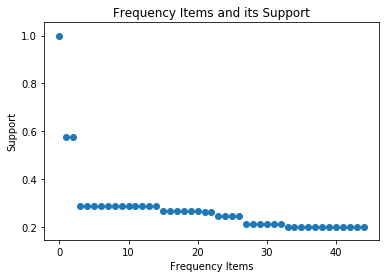

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
print('-----------------------频繁项集及其支持度的散点图--------------------------')
frequenceItem = freq_set_file['freItems']
support = freq_set_file['sup']
x = range(len(frequenceItem))
plt.scatter(x, support)
plt.title("Frequency Items and its Support")
plt.xlabel("Frequency Items")
plt.ylabel("Support")
plt.show()

②关联规则及其评估

-----------------------关联规则及其模型评估的散点图(图中横坐标对应关联规则)--------------------------


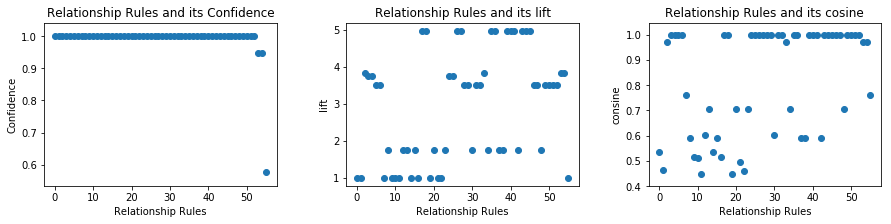

In [11]:
frequenceItem = rulesData['rulesItem']
x = range(len(frequenceItem))

print('-----------------------关联规则及其模型评估的散点图(图中横坐标对应关联规则)--------------------------')
fig  = plt.figure(figsize=(15,3))
plt.subplots_adjust(wspace =0.3, hspace =0.5)
fig1 = fig.add_subplot(1,3,1)
confidence = rulesData['conf']
#plt.xticks(x, frequenceItem, rotation=80)
fig1.scatter(x, confidence)
fig1.set_title('Relationship Rules and its Confidence')
plt.xlabel('Relationship Rules')
plt.ylabel('Confidence')

fig2 = fig.add_subplot(1,3,2)
lift = rulesData['lift']
fig2.scatter(x, lift)
fig2.set_title('Relationship Rules and its lift')
plt.xlabel('Relationship Rules')
plt.ylabel('lift')

fig3 = fig.add_subplot(1,3,3)
allconf = rulesData['cosine']
fig3.scatter(x, allconf)
fig3.set_title('Relationship Rules and its cosine')
plt.xlabel('Relationship Rules')
plt.ylabel('consine')
plt.show()

# 4. 结论
　　①province属性与country属性的关联性极高，仔细查看结果与事实对应。  
　　②品酒者与其对应的twitter账号有紧密的关联性。